In [ ]:
"""Downloading and extracting the data from Kaggle"""

#!pip install kaggle #requirement already satisfied so you can skip it next time

#create a .kaggle directory
!mkdir ~/.kaggle

#copy the kaggle json file to the current instance folder
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# #download the dataset
!kaggle datasets download -d adityajn105/flickr8k
# #you could also use ! kaggle datasets download <name-of-dataset> if the dataset is not in any competition competition /c/

# #unzipping the training and testing folders
!unzip flickr8k.zip


In [7]:
#Upload the following files into your runtime
"""
captions.txt
captions1.txt
glove.6B.200d.txt
words.pkl
words1.pkl
model_9.h5
"""

'\ncaptions.txt\ncaptions1.txt\nglove.6B.200d.txt\nindex_to_words.pkl\nwords_to_index.pkl\n'

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
features = pickle.load(open("images1.pkl", "rb"))
model = load_model('model_9.h5')
images = "Images/"
words_to_index = pickle.load(open("words.pkl", "rb"))
index_to_words = pickle.load(open("words1.pkl", "rb"))


In [9]:
def Image_Caption(picture):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [words_to_index[w] for w in in_text.split() if w in words_to_index]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([picture,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = index_to_words[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:]
    final = ' '.join(final)
    return final

In [10]:
max_length = 32
z = 907
def display_pred(z):
  pic = list(features.keys())[z]
  image = features[pic].reshape((1,2048))
  x = plt.imread(images+pic)
  plt.imshow(x)
  plt.axis('Off')
  #plt.xlabel("Caption:" + Image_Caption(image))
  plt.figtext(0.5,-0.01, "Caption:" + Image_Caption(image), ha="center", va="center", fontsize=18, bbox={"facecolor":"r", "alpha":0.5})
  plt.show()
  
  #print("Caption:", Image_Caption(image))

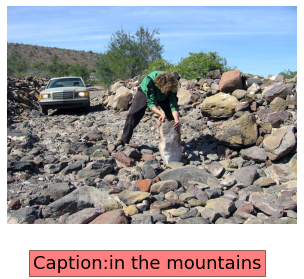

In [11]:
#change the number in here to change the images
display_pred(600)